# IMPORTS



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import plotly.express as px
import random
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#Data Exploration


In [ ]:
df = pd.read_csv("/content/new_devis.csv", encoding='latin-1')

In [ ]:
df.head()

,ProjectID,ClientID,StartDate,EndDate,Duration,Category,Size,Cost
0,4136,169,03/12/2022,01/03/2023,88,AI,Medium,9980
1,2351,4105,18/08/2021,15/09/2021,28,E-commerce,Small,4600
2,3742,640,14/11/2021,22/03/2022,128,AI,Big,18910
3,4320,1421,29/11/2020,05/04/2021,127,UI/UX,Big,13420
4,3149,3411,25/03/2021,08/09/2021,167,Mobile,Big,76790


In [ ]:
df.shape

(5000, 8)

In [ ]:
df.describe()

,ProjectID,ClientID,Duration,Cost
count,5000.000000,5000.000000,5000.0000,5000.000000
mean,2536.436400,2544.470000,78.6326,21959.608000
std,1437.487072,1436.708381,55.9996,28912.066671
min,2.000000,1.000000,15.0000,500.000000
25%,1317.000000,1311.250000,26.0000,3940.000000
50%,2530.500000,2587.500000,62.0000,8290.000000
75%,3793.250000,3795.000000,136.0000,26307.500000
max,5000.000000,5000.000000,180.0000,99960.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProjectID  5000 non-null   int64 
 1   ClientID   5000 non-null   int64 
 2   StartDate  5000 non-null   object
 3   EndDate    5000 non-null   object
 4   Duration   5000 non-null   int64 
 5   Category   5000 non-null   object
 6   Size       5000 non-null   object
 7   Cost       5000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [ ]:
df.EndDate.head()

0    01/03/2023
1    15/09/2021
2    22/03/2022
3    05/04/2021
4    08/09/2021
Name: EndDate, dtype: object

 **We should convert date columns to datetime format**

In [ ]:
df['StartDate'] = pd.to_datetime(df['StartDate'], format='%d/%m/%Y', errors='coerce')
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%d/%m/%Y', errors='coerce')

In [ ]:
df['Cost'] = df['Cost'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ProjectID  5000 non-null   int64         
 1   ClientID   5000 non-null   int64         
 2   StartDate  5000 non-null   datetime64[ns]
 3   EndDate    5000 non-null   datetime64[ns]
 4   Duration   5000 non-null   int64         
 5   Category   5000 non-null   object        
 6   Size       5000 non-null   object        
 7   Cost       5000 non-null   int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 312.6+ KB


In [ ]:
print(df['Category'].unique())
print(df['Size'].unique())

['AI' 'E-commerce' 'UI/UX' 'Mobile' 'IoT' 'Web']
['Medium' 'Small' 'Big']


* The 'Category' column represents nominal data, where the values ['Mobile', 'AI', 'Web', 'IoT'] are distinct Category without any inherent order or hierarchy.

* The 'Size' column represents ordinal data, where the values ['Small', 'Big', 'Medium'] have a natural order indicating different levels of size or complexity, with 'Small' < 'Medium' < 'Big'.

In [ ]:
newData["StartDate_year"] = newData["StartDate"].dt.year
newData["StartDate_month"] = newData["StartDate"].dt.month

newData["EndDate_year"] = newData["EndDate"].dt.year
newData["EndDate_month"] = newData["EndDate"].dt.month


In [ ]:
newData = newData.drop('StartDate', axis=1)
newData = newData.drop('EndDate', axis=1)

In [ ]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Duration         5000 non-null   int64
 1   Category         5000 non-null   int64
 2   Size             5000 non-null   int64
 3   Cost             5000 non-null   int64
 4   StartDate_year   5000 non-null   int64
 5   StartDate_month  5000 non-null   int64
 6   EndDate_year     5000 non-null   int64
 7   EndDate_month    5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB


# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE

**We need first to split the data**

In [ ]:
X = newData.drop('Cost', axis=1)  # Features
y = newData['Cost']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

**This can help for FEATURE SELECTION**

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Specify the number of desired features to keep
num_features_to_keep = 3

# Create an RFE object and fit it to the data
rfe = RFE(estimator=model, n_features_to_select=num_features_to_keep)
X_rfe = rfe.fit_transform(X, y)

# Get the mask of selected features
feature_mask = rfe.support_

# Get the names of selected features
selected_features = X.columns[feature_mask]

# Print the selected feature names
print("Selected features:")
print(selected_features)

Selected features:
Index(['Duration', 'Size', 'EndDate_year'], dtype='object')


**LinearRegression**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2) Score:", r2)

Mean Squared Error (MSE): 147173431.7077854
R-Squared (R^2) Score: 0.8215234483399759


**DecisionTreeRegressor**

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2) Score:", r2)

Mean Squared Error (MSE): 18918059.933333334
R-Squared (R^2) Score: 0.9770581547102677


**Ridge**

In [ ]:
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2) Score:", r2)

Mean Squared Error (MSE): 147151732.3652717
R-Squared (R^2) Score: 0.8215497630340086


**Lasso**

In [ ]:
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2) Score:", r2)

Mean Squared Error (MSE): 147140345.3040139
R-Squared (R^2) Score: 0.8215635720714364


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.001e+11, tolerance: 2.942e+08



**KNeighborsRegressor**

In [ ]:
model = KNeighborsRegressor(n_neighbors=4)  # Specify the number of neighbors (k)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2) Score:", r2)

Mean Squared Error (MSE): 13304387.4875
R-Squared (R^2) Score: 0.9838658297685657


**AdaBoostRegressor**

In [ ]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2) Score:", r2)

Mean Squared Error (MSE): 10624799.140571665
R-Squared (R^2) Score: 0.9871153543769048


**RandomForestRegressor**

In [ ]:
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rf_feature_importances = RandomForestRegressor.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance scores and corresponding feature names
for index, row in feature_importance_df.iterrows():
    print(row['Feature'], ": ", row['Importance'])


print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2) Score:", r2)

Duration :  0.9619726058132293
Size :  0.02987639043964466
Category :  0.0021327476704206907
StartDate_month :  0.0019087961683519645
EndDate_month :  0.0018628891212910967
EndDate_year :  0.0011245285303889921
StartDate_year :  0.0011220422566733004
Mean Squared Error (MSE): 10542984.108327165
R-Squared (R^2) Score: 0.9872145710946202


In [ ]:
# Select a few examples to display
sample_indices = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# Display the predicted Cost and actual Cost for the selected examples
for idx in sample_indices:
    predicted_Cost = y_pred[idx]
    actual_Cost = y_test.iloc[idx]
    print(f"Example {idx+1}: Predicted Cost={predicted_Cost:.2f}, Actual Cost={actual_Cost:.2f}")


Example 1: Predicted Cost=3248.70, Actual Cost=3730.00
Example 11: Predicted Cost=1347.93, Actual Cost=1510.00
Example 21: Predicted Cost=58360.40, Actual Cost=51360.00
Example 31: Predicted Cost=3405.83, Actual Cost=3420.00
Example 41: Predicted Cost=1462.90, Actual Cost=700.00
Example 51: Predicted Cost=9257.15, Actual Cost=9890.00
Example 61: Predicted Cost=8360.64, Actual Cost=8410.00
Example 71: Predicted Cost=9387.64, Actual Cost=9600.00
Example 81: Predicted Cost=15063.00, Actual Cost=26570.00
Example 91: Predicted Cost=3029.80, Actual Cost=2460.00


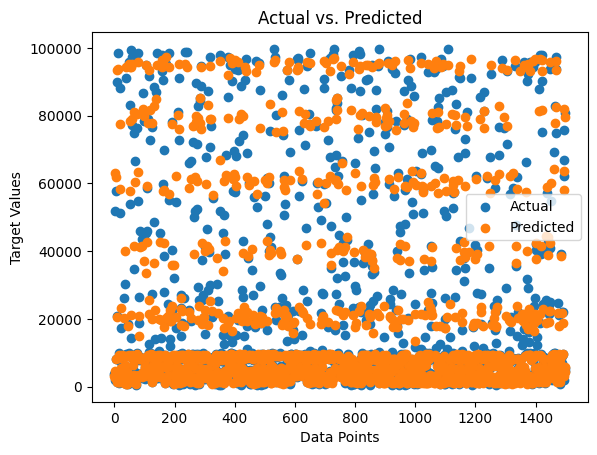

In [ ]:
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

**By far the RandomForestRegressor showed the best results as we can see the examples above and also by comparing the (MSE) and the (R-squared) with other models**